##                     Project 6- Pharmaceutical Sales prediction across multiple stores

### Objective

##### The objective of the project is to develop a machine learning solution that accurately predicts pharmaceutical sales across multiple stores of Rossmann Pharmaceuticals. The prediction should cover a period of six weeks ahead of time, incorporating various factors such as promotions, competition, school and state holidays, seasonality, and locality. The end product should provide reliable forecasts to assist the finance team in making informed decisions regarding resource allocation, inventory management, and strategic planning.

### Business Need

##### Rossmann Pharmaceuticals requires accurate sales forecasting to optimize its operations and maximize profitability. Currently, individual store managers rely on subjective methods for sales prediction, which may lead to inefficiencies and missed opportunities. By implementing a data-driven approach, the company aims to improve the accuracy of sales forecasts, enabling better resource allocation, inventory planning, and promotional strategies. Additionally, the centralized prediction system will provide a standardized method for forecasting across all stores, ensuring consistency and alignment with company objectives. Ultimately, the project addresses the business need for enhanced decision-making capabilities and improved operational efficiency within Rossmann Pharmaceuticals

### Libraries Used

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data

Importing Store data

In [10]:
pharma_store=pd.read_csv("store.csv")

Importing Test Data

In [11]:
pharma_test=pd.read_csv("test.csv")

Importing Train Data

In [12]:
pharma_train=pd.read_csv("train.csv")

C:\Users\pooji\AppData\Local\Temp\ipykernel_36008\1355783094.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  pharma_train=pd.read_csv("train.csv")


##### Since getting Dtype error in the Promo Column, we have modified the code

In [13]:
pharma_train = pd.read_csv("train.csv", dtype={"Promo": "int64"}, low_memory=False)

In [14]:
pharma_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [15]:
pharma_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [16]:
pharma_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### Pharma_Store data analysis

### Information about pharma_store data frame

In [17]:
pharma_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Finding the Unique values in the columns

In [18]:
pharma_store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [19]:
pharma_store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [20]:
pharma_store['CompetitionDistance'].unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [21]:
pharma_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [22]:
pharma_store['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [23]:
pharma_store['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [24]:
pharma_store['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [25]:
pharma_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

### Finding the null values in pharma_store dataframe

In [26]:
pharma_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Filling Missing Values

In [27]:
pharma_store['CompetitionDistance'].fillna(pharma_store['CompetitionDistance'].median())
pharma_store['CompetitionOpenSinceMonth'].fillna(value=0, inplace=True)
pharma_store['CompetitionOpenSinceYear'].fillna(value=0, inplace=True)
pharma_store['Promo2SinceWeek'].fillna(value=0, inplace=True)
pharma_store['Promo2SinceYear'].fillna(value=0, inplace=True)
pharma_store['PromoInterval'].fillna('Not Available', inplace=True)


* In the Column 'CompetitionDistance' - fills missing values with Median value
* In the Column 'CompetitionOpenSinceMonth' - fills missing values with '0'
* In the Column 'CompetitionOpenSinceYear' - fills missing values with '0'
* In the Column 'Promo2SinceWeek' - fills missing values with '0'
* In the Column 'Promo2SinceYear' - fills missing values with '0'
* In the Column 'PromoInterval' - fills missing values with 'Not Available'

* Overall handling the missing values replacing them with a meaningfull values


### Pharma_Test Data Analysis 

In [28]:
pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [29]:
pharma_test['Id'].unique()

array([    1,     2,     3, ..., 41086, 41087, 41088], dtype=int64)

In [30]:
pharma_test['DayOfWeek'].unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [31]:
pharma_test['Date'].unique()

array(['2015-09-17', '2015-09-16', '2015-09-15', '2015-09-14',
       '2015-09-13', '2015-09-12', '2015-09-11', '2015-09-10',
       '2015-09-09', '2015-09-08', '2015-09-07', '2015-09-06',
       '2015-09-05', '2015-09-04', '2015-09-03', '2015-09-02',
       '2015-09-01', '2015-08-31', '2015-08-30', '2015-08-29',
       '2015-08-28', '2015-08-27', '2015-08-26', '2015-08-25',
       '2015-08-24', '2015-08-23', '2015-08-22', '2015-08-21',
       '2015-08-20', '2015-08-19', '2015-08-18', '2015-08-17',
       '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
       '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
       '2015-08-08', '2015-08-07', '2015-08-06', '2015-08-05',
       '2015-08-04', '2015-08-03', '2015-08-02', '2015-08-01'],
      dtype=object)

In [32]:
pharma_test['Open'].unique()

array([ 1., nan,  0.])

In [33]:
pharma_test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [34]:
pharma_test['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

#### Data column in Object, Converting into Datatime 

In [35]:
pharma_test['Date']=pd.to_datetime(pharma_test['Date'])

In [36]:
pharma_test['Date'].unique

<bound method Series.unique of 0       2015-09-17
1       2015-09-17
2       2015-09-17
3       2015-09-17
4       2015-09-17
           ...    
41083   2015-08-01
41084   2015-08-01
41085   2015-08-01
41086   2015-08-01
41087   2015-08-01
Name: Date, Length: 41088, dtype: datetime64[ns]>

#### Replacing 'a' with '1' (0 considered has No holiday where as 1 Considered Public Holiday)

In [37]:
pharma_test['StateHoliday']=pharma_test['StateHoliday'].replace({'a':1,'0':0})

In [38]:
pharma_test['StateHoliday'].unique()

array([0, 1], dtype=int64)

In [39]:
pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  int64         
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 2.5 MB


### Finding Missing Values in pharma_test Dataset

In [40]:
pharma_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

#### Fill missing values in the 'Open' column using forward fill

In [41]:
pharma_test['Open'].fillna(method='ffill', inplace=True)

C:\Users\pooji\AppData\Local\Temp\ipykernel_36008\2225413122.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pharma_test['Open'].fillna(method='ffill', inplace=True)


In [42]:
pharma_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Pharma_Train Data Analysis

In [43]:
pharma_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Unique value in Date- Since it is showing Dtype-Object

In [44]:
pharma_train['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

#### Convering the Object to Datetime type

In [45]:
pharma_train['Date']=pd.to_datetime(pharma_train['Date'])

#### Replacing Object to Integer (0 considered has No holiday, 1 Considered Public Holiday, 2 Considered Easter holiday, 3 Considered Chirstmas holiday)

In [46]:
pharma_train['StateHoliday']=pharma_train['StateHoliday'].replace({'0':0,'a':1,'b':2,'c':3})

In [47]:
pharma_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 69.8 MB


### Finding the Missing values in phama_train dataset

In [48]:
pharma_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

##### There is no null values in pharma_train dataset

In [49]:
pharma_store.corr().round(2)

ValueError: could not convert string to float: 'c'

## Data Visualization for Pharma Store Data

### Pie Plot for Type of Stores

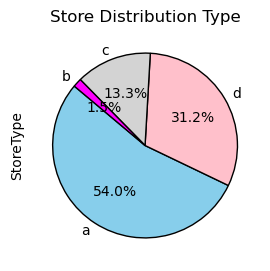

In [ ]:
plt.figure(figsize=(5,3))
colors=['skyblue', 'pink', 'lightgray', 'magenta']
pie= pharma_store['StoreType'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
for patch in pie.patches:
    patch.set_edgecolor('black')
plt.title('Store Distribution Type')
plt.axis='equal'
plt.show()

##### *Interpretation*
Based on the provided pie chart and the distribution of store types:

* Store Type A accounts for the majority, with 54% of the distribution.
* Store Type B has the smallest representation, comprising only 1.5% of the total.
* Store Type C constitutes 13.3% of the distribution.
* Store Type D, which is not explicitly mentioned in the provided code but seems to be present based on the percentages provided, makes up the remaining 31.2%.

##### *Analysis*

* *Market Dominance:* Store Type A is the most prevalent, indicating it holds a significant market share, likely due to popularity or profitability.

* *Niche Focus:* Store Type B has a minimal presence, suggesting it caters to a specialized market segment or serves unique needs.

* *Market Diversity:* The presence of multiple store types shows a strategy of catering to diverse customer preferences.

* *Growth Opportunities:* Store Type D, though not explicitly mentioned, holds a substantial share, indicating an opportunity for further investment and growth.

* *Optimization:* Analyzing performance per store type can help optimize operations and resource allocation, ensuring maximum profitability.

#### *Conclusion*

In summary, understanding the distribution of store types enables strategic decisions to maintain dominance, exploit growth opportunities, and optimize operations within the pharmaceutical business.


### Count plot for Assortment Distribution 

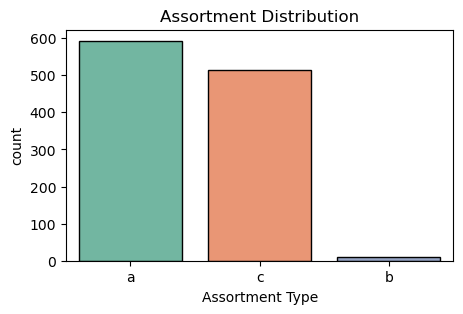

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=pharma_store, x='Assortment', palette='Set2', edgecolor='black')
plt.title('Assortment Distribution')
plt.xlabel('Assortment Type')
plt.show()


##### *Interpretation*
Based on the provided countplot and the distribution of assortment types:

* Assortment Type a has the highest count, with approximately 600 occurrences.
* Assortment Type c follows with around 500 occurrences.
* Assortment Type b, although not explicitly specified in the provided data, seems to have a very small representation, with a bar that is above 0 but below 10 or 5, indicating minimal occurrence.


##### *Analysis*

* *Assortment Preference:* There's a preference for Assortment Type a and Type c, as they make up the majority of the distribution. This suggests that these assortments may align more closely with customer preferences or business strategies.

* *Limited Representation:* Assortment Type b, with its minimal representation, indicates that it may cater to a specialized or niche market segment, or it might not be a focus for the pharmaceutical business.

* *Strategic Implications:* Understanding the distribution of assortment types can inform inventory management, marketing strategies, and product offerings to better meet customer demands and preferences.

##### *Conclusion*
Overall, this analysis provides insight into the assortment distribution within the pharmaceutical store dataset, which can guide decision-making to optimize product assortment and enhance customer satisfaction.


### KDE Plot for Competition Distance

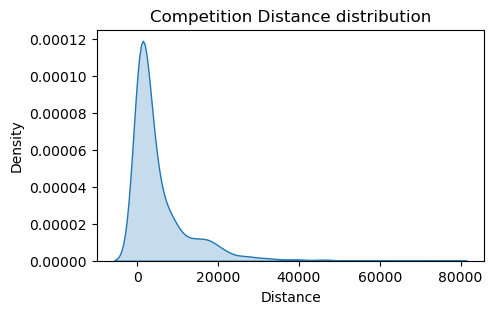

In [ ]:
plt.figure(figsize=(5,3))
sns.kdeplot(pharma_store['CompetitionDistance'],fill=True)
plt.title('Competition Distance distribution')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.show()

##### *Interpretation*

Based on the KDE plot of the distribution:

* The distribution of competitor distances appears to be skewed towards lower distances, with the density peaking around 0 to approximately 15,000 meters.
* From 15,000 to 20,000 meters, the density drops significantly to around 0.00001, indicating a decrease in the frequency of competitors within this distance range.
* Beyond 20,000 meters, the density further decreases, falling below 0.00001, suggesting very few competitors exist at distances greater than 20,000 meters.

##### *Analysis* 

* *Proximity of Competitors:* The majority of competitors seem to be located within a relatively close distance of 0 to 15,000 meters, indicating a high level of competition in nearby areas.

* *Sparse Competition at Greater Distances:* As distances increase beyond 15,000 meters, the density of competitors decreases sharply. Beyond 20,000 meters, competition becomes scarce, suggesting potential opportunities for the pharmaceutical stores to expand into areas with fewer competitors.

##### *Conclusion*

Understanding the distribution of competitor distances can inform strategic decisions regarding market positioning, expansion plans, and competitive analysis within the pharmaceutical industry.


### Countplot for Promotion Distribuition by Store Type

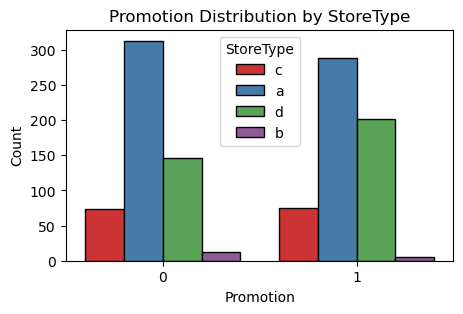

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='Promo2', hue='StoreType', data=pharma_store, palette='Set1', edgecolor='black')
plt.title('Promotion Distribution by StoreType')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.legend(title='StoreType')
plt.show()

##### *Interpretation*
The provided countplot illustrates the distribution of promotions (Promo2) across different store types within the pharmaceutical dataset.

* *For Promotion 0:*

Store Type A exhibits the highest participation, followed by Store Type D and Store Type C. Store Type B has the lowest participation.

* *For Promotion 1:*

Store Type A continues to have the highest participation, followed closely by Store Type D. Store Type C also shows considerable participation, albeit slightly less than Store Type A and D. Store Type B remains the least involved in promotions.

##### *Analysis*

The analysis reveals distinct patterns in promotion participation across various store types:

* *Store Type Preferences:* Store Types A and D are consistently more active in both Promotion 0 and Promotion 1, indicating a stronger inclination towards promotional activities. Store Type B consistently demonstrates the lowest participation, suggesting potential differences in marketing strategies or customer bases.

* *Promotion Effectiveness:* Understanding the varying participation levels of different store types in promotions can guide the optimization of promotional strategies. Store Types A and D, being more actively involved, might benefit from tailored promotional campaigns, while Store Types B and C might require different approaches to encourage participation.

* *Market Segmentation:* The differences in promotion participation across store types highlight potential segmentation within the pharmaceutical market. Tailoring promotions based on store type characteristics can lead to more effective targeting and allocation of resources.

##### *Conclusion*

In summary, the analysis underscores the importance of understanding the distribution of promotions across different store types to optimize promotional strategies and enhance market effectiveness within the pharmaceutical industry.


### Bar plot for Comptition Open Since Month

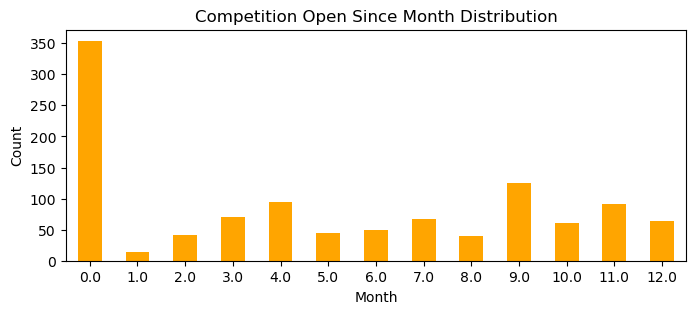

In [ ]:
plt.figure(figsize=(8, 3))
pharma_store['CompetitionOpenSinceMonth'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Competition Open Since Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##### *Interpretation*

The countplot visualizes the distribution of promotional intervals (PromoInterval) within the pharmaceutical store dataset. It provides a snapshot of how frequently different promotional intervals occur.

* The majority of instances have no promotional interval, with a count of over 500.
* Promotional intervals occurring in January, April, July, and October are the next most common, with approximately 350 occurrences each.
* February, May, August, and November follow, with approximately 140 occurrences each.
* March, June, September, and December have the fewest occurrences, with around 100 each.

##### *Analysis*

*Promotional Intervals:* The data suggests that the most frequent promotional intervals occur in the months of January, April, July, and October, followed by February, May, August, and November. March, June, September, and December have the fewest instances of promotional intervals.

*Promotion Planning:* Understanding the distribution of promotional intervals can aid in planning marketing strategies and resource allocation. For instance, knowing the most common promotional months allows for better preparation and optimization of promotional campaigns during those periods.

*Seasonal Trends:* The distribution of promotional intervals may reflect seasonal trends or patterns in consumer behavior. For example, promotions may be more prevalent during certain months to coincide with holidays, seasons, or other factors affecting consumer purchasing decisions.

##### *Conclusion*

In summary, analyzing the distribution of promotional intervals provides valuable insights into the timing and frequency of promotional activities within the pharmaceutical industry, aiding in strategic decision-making and campaign planning.


### Bar plot for Copetition Open Since Year Distribution

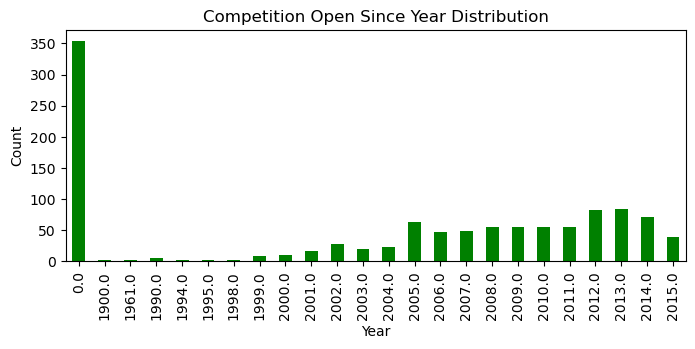

In [ ]:
plt.figure(figsize=(8, 3))
pharma_store['CompetitionOpenSinceYear'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Competition Open Since Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### *Interpretation*

The countplot visualization illustrates the distribution of "Competition Open Since Year" in a pharmaceutical store dataset. Here's how the data is distributed:

* There are 354 instances where the competition opening year is not specified (year 0).

* The years with the highest counts of competition openings are 2012 and 2013, with 82 and 83 instances respectively.
The lowest count is in the year 2003, with only 27 instances.

##### *Analysis*

* *Distribution Trends*

The data indicates a varied distribution of competition opening years, with a peak in the years 2012 and 2013. This suggests that there was a significant influx of new competition during this period.
There is a general trend of increasing competition openings from earlier years to around 2013, followed by a decline in the subsequent years.

* *Potential Implications*

High competition openings in 2012 and 2013 might indicate a period of rapid expansion or market saturation, where new competitors entered the market to capitalize on growing demand.
The decline in competition openings in the years following 2013 could imply a stabilization of the market or a slowdown in new entrants, possibly due to factors such as regulatory changes, economic conditions, or shifts in consumer preferences.

##### *Conclusion*

The analysis of competition opening years provides insights into the dynamics of the pharmaceutical market. The peak in competition openings around 2012 and 2013 suggests a period of heightened activity and possibly increased competitive pressure. However, the subsequent decline in competition openings indicates a potential shift in market dynamics or saturation.

### Histplot for Competition Open since month

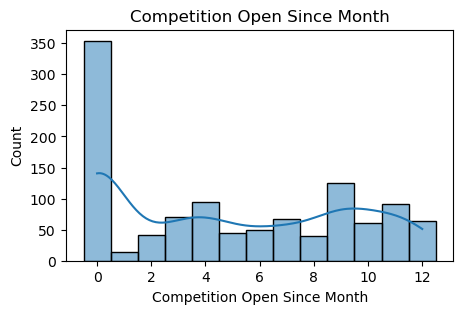

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=pharma_store, x='CompetitionOpenSinceMonth', discrete=True, kde=True, binwidth=1)
plt.title('Competition Open Since Month')
plt.xlabel("Competition Open Since Month")
plt.show()

##### *Interpretation*

* Month 0 has the highest count of competitor openings, with approximately 354 competitors entering the market during that period.
* Other months show varying numbers of competitor openings, with Month 9 having the second-highest count at 125, followed by Month 11 with 92, Month 4 with 94, and Month 10 with 61.
* Months 1, 2, 5, 6, 7, 8, and 12 also have competitor openings, though with smaller counts ranging from 14 to 70.

##### *Analysis*

* *Competitor Entry Peaks:* Month 0 experiences the highest influx of competitor entries, suggesting a significant period of market activity or opportunity for new entrants. This may indicate favorable market conditions or strategic timing for market entry.

* *Variability Across Months:* While Month 0 stands out as the peak for competitor entries, other months also witness substantial competitor activity. Understanding the distribution across months allows for better anticipation of competitive pressures and market dynamics throughout the year.

* *Strategic Implications:* Pharmaceutical businesses can use this information to plan their market entry, expansion, and competitive response strategies. Identifying periods of heightened competition can help in allocating resources, adjusting pricing strategies, and developing marketing campaigns to maintain competitiveness.

##### *Conclusion*

In summary, analyzing the distribution of competitor opening months provides valuable insights into the competitive landscape within the pharmaceutical industry, aiding in strategic decision-making and market positioning.

### Violin Plot for Promo2 since week

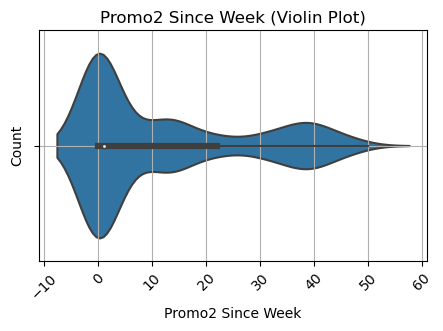

In [ ]:
plt.figure(figsize=(5, 3))
sns.violinplot(data=pharma_store, x='Promo2SinceWeek')
plt.title('Promo2 Since Week (Violin Plot)')
plt.xlabel('Promo2 Since Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### *Interpretation*

* The widest part of the violins represents the density of the data, with wider areas indicating higher density.
* The thin lines extending from the violins, known as "whiskers," show the range of the data.
* Promotional activations are observed across various weeks, with different levels of density and variability.
* Weeks 0, 15, 30, and 40 have substantial occurrences of promotion, indicating these weeks are frequently chosen for promotional activities.
* Weeks 10 and 22 also show notable occurrences of promotion, albeit less than the aforementioned weeks.
* Week 27 displays some promotion occurrences but is generally less common compared to other weeks.
* Weeks 5, 37, 47, and weeks below 18 have minimal occurrences of promotion, suggesting these weeks are less favored for promotional activities.

##### *Analysis*

* *Promotional Timing:* Certain weeks, such as weeks 0, 15, 30, and 40, are more commonly chosen for promotional activities, potentially due to strategic considerations such as seasonal trends, holidays, or sales events.

* *Variability:* The distribution of promotions across different weeks indicates variability in promotional strategies, with some weeks being more favored than others.

* *Opportunities:* Understanding the distribution of promotion occurrences can help identify opportunities for optimizing promotional strategies, such as targeting underutilized weeks or adjusting promotional timing based on historical performance.

##### *Conclusion*

In summary, the detailed analysis of Promo2 activation weeks provides insights into the temporal distribution of promotional activities within the pharmaceutical dataset, guiding strategic decisions to enhance promotional effectiveness and market impact.

### Count Plot for Promo2 Since year 

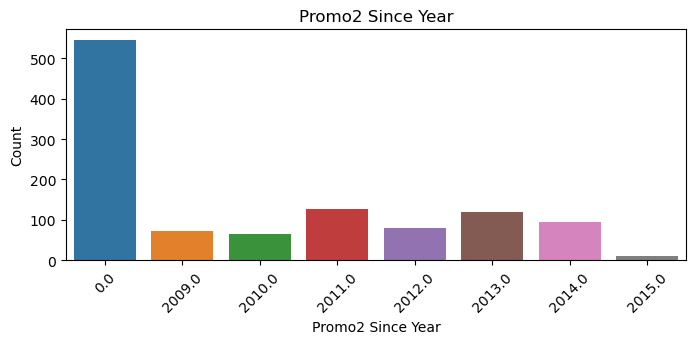

In [ ]:
plt.figure(figsize=(8, 3))
sns.countplot(data=pharma_store, x='Promo2SinceYear')
plt.title('Promo2 Since Year')
plt.xlabel("Promo2 Since Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### *Interpretation*

The countplot visualization you provided displays the distribution of "Promo2 Since Year" in a pharmaceutical store dataset. 

* Distribution: The majority of stores seem to have had their Promo2 offers since the years 2011, 2013, and 2014, as these years have higher counts compared to others.

* Trend Analysis: There's a noticeable trend of increasing counts from 2009 to 2013, indicating a potential rise in the adoption of Promo2 offers during this period. However, the count decreases in 2014 and drastically drops in 2015.

##### *Analysis*

* Adoption Rate: The increase in counts from 2009 to 2013 might suggest that more stores started participating in the Promo2 offers during this time, possibly due to the effectiveness of these promotions in driving sales.

* Market Saturation: The decrease in counts in 2014 and 2015 could indicate a saturation point where most stores that could benefit from Promo2 offers were already participating, leading to fewer new adoptions in subsequent years.

* Strategy Shift: Alternatively, the drop in counts in 2015 might suggest a change in the company's marketing strategy or a decline in the effectiveness of Promo2 offers, leading to fewer stores opting for this promotion.

##### *Conclusion*

Based on the data, it seems that Promo2 offers were increasingly adopted by pharmaceutical stores from 2009 to 2013, but there was a decline in adoption in 2014 and 2015. Further investigation into the effectiveness of these promotions and market dynamics could provide valuable insights for refining promotional strategies in the future.

### Join plot for Competition distance Vs Promo2 since week

<Figure size 800x600 with 0 Axes>

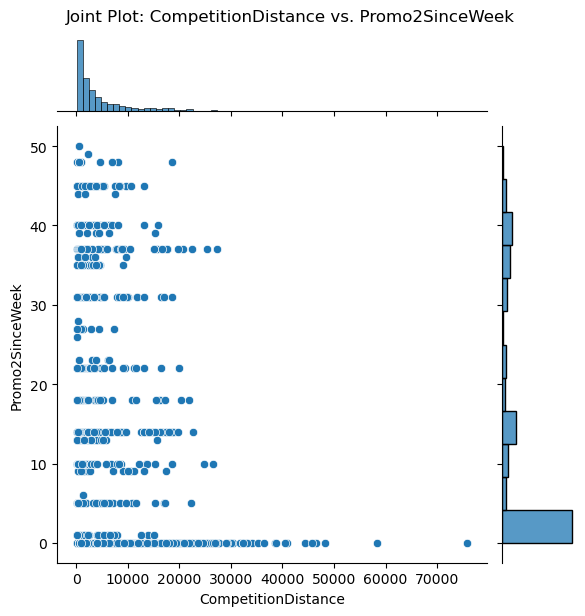

In [ ]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='CompetitionDistance', y='Promo2SinceWeek', data=pharma_store, kind='scatter')
plt.suptitle('Joint Plot: CompetitionDistance vs. Promo2SinceWeek', y=1.02)
plt.show()

##### *Interpretation*

* The joint plot you provided displays the relationship between "CompetitionDistance" and "Promo2SinceWeek" in the pharmaceutical store dataset.

* The scatter plot in the center of the joint plot illustrates the relationship between "CompetitionDistance" (x-axis) and "Promo2SinceWeek" (y-axis).
* Each point on the scatter plot represents a combination of "CompetitionDistance" and "Promo2SinceWeek" for a particular observation in the dataset.

##### *Analysis*

* The scatter plot indicates the dispersion of data points across different values of "CompetitionDistance" and "Promo2SinceWeek".
It appears that as "CompetitionDistance" increases, there is no clear trend in the values of "Promo2SinceWeek". The points are spread out without a clear pattern of correlation or trend.

* The provided data on "CompetitionDistance" and "Promo2SinceWeek" for specific values suggests some level of association between these variables. However, this association is not clearly reflected in the scatter plot.

##### *Conclusion*

The joint plot does not show a strong or clear relationship between "CompetitionDistance" and "Promo2SinceWeek".

While there may be some association between these variables based on the provided data points, the scatter plot does not reveal a distinct trend or pattern.

### Pairplot for Numerical Variable

<Figure size 1200x800 with 0 Axes>

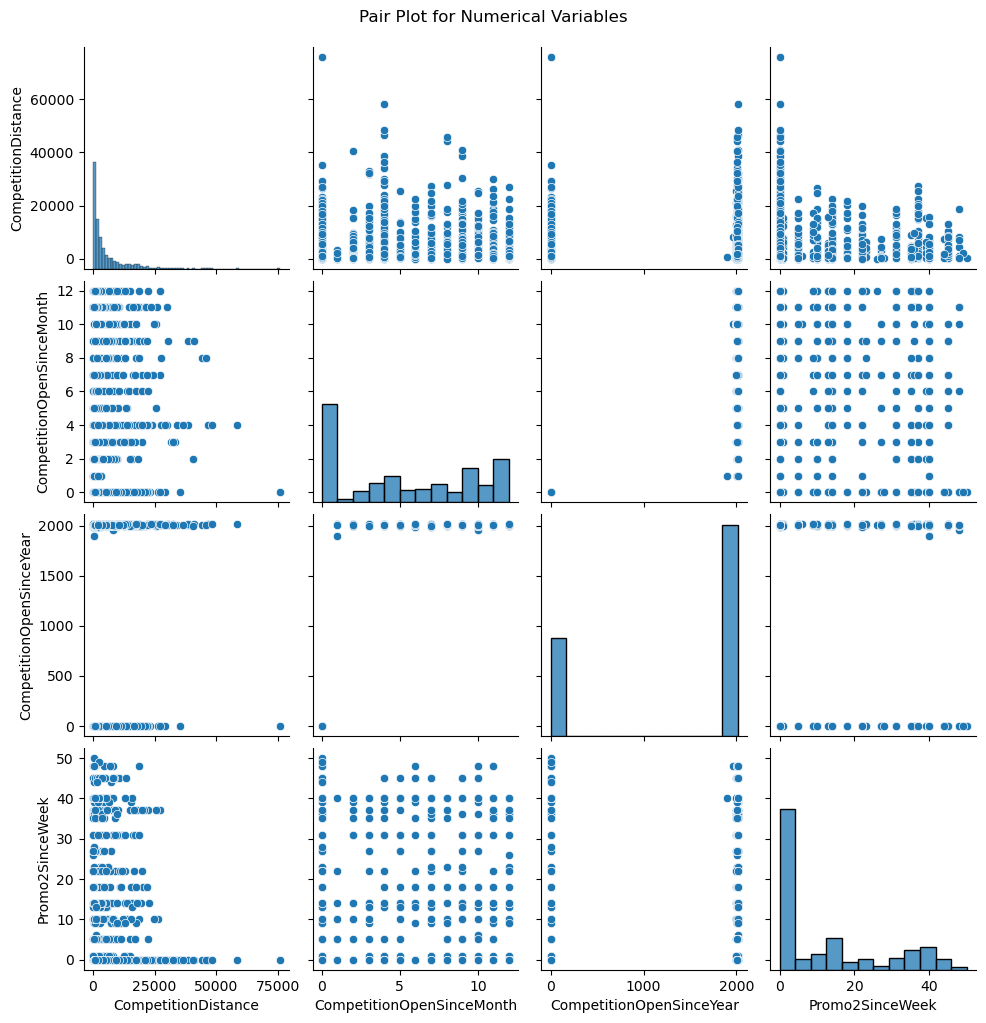

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(pharma_store[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek']])
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

##### *Interpretation*

* The pairplot visualization showcases the relationships between selected numerical variables ("CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", and "Promo2SinceWeek") in a pharmaceutical store dataset.

* Each scatter plot in the pair plot matrix represents the relationship between two numerical variables.
Diagonal plots display the distribution of each variable.
Off-diagonal plots show the relationship between pairs of variables.

##### *Analysis*

* *Competition Distance vs. Other Variables:*

Observing scatter plots involving "CompetitionDistance":
Scatter plots involving "CompetitionDistance" against other variables can reveal potential correlations or patterns.

* *Competition Open Since Month and Year:*

These variables might be correlated, indicating that certain stores opened in specific months or years.
Scatter plots involving these variables can provide insights into the distribution of competition openings over time and potential seasonality effects.

* *Promo2 Since Week:*

Examining its relationship with other variables might reveal patterns in the timing of promotional activities concerning the opening of competitors or other factors like seasonal trends.


##### *Conclusion*

The pair plot offers a comprehensive view of the relationships between numerical variables in the dataset, allowing for a quick assessment of potential correlations and patterns.

Insights gained from this analysis can inform strategic decisions related to competition management, promotional timing, and overall business operations in the pharmaceutical retail sector.

### Box plot for Store Type Vs Competition Distrance

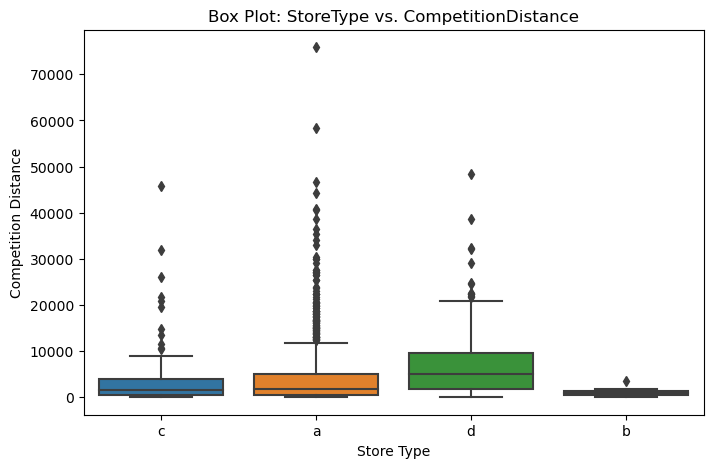

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='StoreType', y='CompetitionDistance', data=pharma_store)
plt.title('Box Plot: StoreType vs. CompetitionDistance')
plt.xlabel('Store Type')
plt.ylabel('Competition Distance')
plt.show()

##### *Interpretation*

In the boxplot visualization, the distribution of "Competition Distance" is compared across different "Store Types" in a pharmaceutical store dataset.

* Each box in the plot represents the distribution of competition distances for a specific store type.
* The central line within each box denotes the median competition distance.
* The box itself spans the interquartile range (IQR) of competition distances, showing where the middle 50% of the data lies.
* The whiskers extend to 1.5 times the IQR above and below the upper and lower quartiles respectively. Any data points beyond the whiskers are considered outliers.
* You've provided additional information regarding the number of stores for each store type.

##### *Analysis*

* *Comparison of Median Distances:*

The median competition distances for each store type can be compared directly from the plot. This can give insights into which store type typically faces closer or more distant competition.
For instance, if Store Type B has a lower median competition distance compared to others, it suggests that these stores are generally located closer to their competitors.

* *Variability Across Store Types:*

The spread of the boxes (IQR) and the presence of outliers provide insights into the variability of competition distances within each store type.

A wider spread indicates more variability in competition distances, whereas a narrower spread suggests more consistency.

* *Relationship with Store Counts:*

Knowing the number of stores for each type provides additional context. For example, if Store Type C has the highest number of stores but also a wide range of competition distances, it suggests varied market conditions within this store type.

##### *Conclusion*

The boxplot analysis offers insights into the distribution and variability of competition distances across different store types in the pharmaceutical retail dataset.

Understanding these variations can inform strategic decisions related to site selection, marketing, and pricing strategies.


### Bar plot for Store Type vs Competition Distance Vs Assortment 

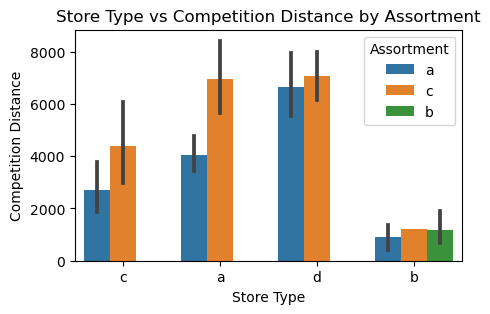

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(data=pharma_store, x='StoreType', y='CompetitionDistance', hue='Assortment')
plt.title('Store Type vs Competition Distance by Assortment')
plt.xlabel('Store Type')
plt.ylabel('Competition Distance')
plt.show()


##### *Interpretation*

* In the bar plot visualization provided, the comparison of "Competition Distance" across different "Store Types" is presented, with further differentiation based on "Assortment." 

* Each bar in the plot represents the average competition distance for a specific combination of store type and assortment.

* The hue differentiation (different colors) within each bar represents the different assortments (e.g., Assortment A and Assortment C).

* You've provided additional information regarding the average competition distance for each combination of store type and assortment.

##### *Analysis*

* *Comparison of Competition Distances Across Store Types and Assortments:*

The bar plot allows for a comparison of average competition distances across different store types while considering the assortment type.
Within each store type, the difference in bar heights between different assortments indicates variations in average competition distances based on the assortment offered by the stores.

* *Identification of Trends:*

By observing the relative heights of bars and comparing them across different store types and assortments, trends in competition distances can be identified.

* *Verification of Additional Information:*

The additional information provided regarding average competition distances for each combination of store type and assortment can be cross-checked with the heights of the bars in the plot to ensure consistency and accuracy.

##### *Conclusion*

The bar plot offers insights into how competition distances vary across different store types and assortments within the pharmaceutical retail dataset.

Understanding these variations can inform strategic decisions related to assortment planning, site selection, and competitive positioning.

### Correlation Matrix for Store Data

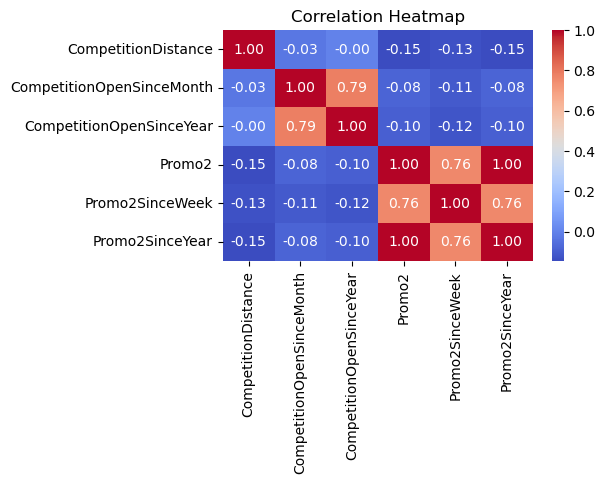

In [ ]:
plt.figure(figsize=(5, 3))
sns.heatmap(pharma_store[[ 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### *Interpretation*

* The heatmap displays the correlation coefficients between selected numerical variables in the pharmaceutical store dataset.

Correlation coefficients range from -1 to 1, where:
* 1 indicates a perfect positive correlation,
* -1 indicates a perfect negative correlation, and
* 0 indicates no correlation.

* Positive correlations imply that as one variable increases, the other tends to increase as well, while negative correlations suggest that as one variable increases, the other tends to decrease.

* The annotations in the heatmap show the correlation coefficients between pairs of variables, with higher absolute values indicating stronger correlations.

##### *Analysis*

*CompetitionOpenSinceMonth and CompetitionOpenSinceYear:*

These two variables exhibit a strong positive correlation of 0.79, indicating that there's a strong tendency for stores to open in specific months and years together. This suggests that the month and year of competition openings are closely related.

*Promo2, Promo2SinceWeek, and Promo2SinceYear:*

* 'Promo2' is correlated with 'Promo2SinceWeek' at 0.76, suggesting a strong positive correlation. This indicates that the presence of Promo2 is closely related to the week since Promo2 was started, implying that promotions tend to be initiated around specific weeks.

* 'Promo2SinceYear' is perfectly correlated with 'Promo2SinceYear' at 1.00, indicating a perfect positive correlation, which is expected since 'Promo2SinceYear' is essentially the same as 'Promo2' since they both represent the presence of Promo2.

* 'Promo2SinceWeek' is also correlated with 'Promo2SinceYear' at 0.76, reinforcing the relationship between the timing of Promo2 initiation and the year it was started.

##### *Conclusion*

The correlation heatmap provides insights into the relationships between numerical variables in the pharmaceutical store dataset.
Understanding these correlations can help in identifying potential patterns or dependencies between variables, which can inform further analysis or modeling efforts.

It's essential to consider these correlations in the context of the dataset and the domain to make informed decisions and draw meaningful conclusions.


##### *Statistics Analysis* - Ordinary Least Squares (OLS) regression model

In [ ]:
import statsmodels.api as sm
X = pharma_store[['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']]
X = sm.add_constant(X)
y = pharma_store['Store']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Store   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3811
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.767
Time:                        19:00:58   Log-Likelihood:                -8019.7
No. Observations:                1115   AIC:                         1.605e+04
Df Residuals:                    1111   BIC:                         1.607e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             555.5312     13.818     

##### *Interpretation*

The summary of the Ordinary Least Squares (OLS) regression model fitted to the data:

* *R-squared and Adjusted R-squared:* Both R-squared and adjusted R-squared values are very close to 0, indicating that the independent variables (Promo2, Promo2SinceWeek, and Promo2SinceYear) collectively explain very little of the variability observed in the dependent variable (Store).

* *F-statistic and Prob (F-statistic):* The F-statistic measures the overall significance of the regression model. In this case, the low F-statistic value (0.3811) coupled with a high p-value (0.767) suggests that the regression model as a whole is not statistically significant.

* *Coefficients and p-values:* None of the coefficients for the independent variables are statistically significant at the conventional significance level of 0.05. This implies that there is insufficient evidence to conclude that Promo2, Promo2SinceWeek, or Promo2SinceYear have a significant linear relationship with the Store variable.

##### *Analysis*

* The regression model, including Promo2, Promo2SinceWeek, and Promo2SinceYear as predictors, fails to adequately explain the variability observed in the Store variable.

* The low R-squared and adjusted R-squared values indicate that the model does not capture much of the variation in the dependent variable, suggesting that other factors not included in the model may be influencing Store.

* The non-significant coefficients and F-statistic indicate that there is no statistically significant relationship between the predictors (Promo2, Promo2SinceWeek, and Promo2SinceYear) and the Store variable. This suggests that these variables do not serve as good predictors for the Store variable within the linear regression framework.

##### *Conclusion*

* The regression model, as constructed with Promo2, Promo2SinceWeek, and Promo2SinceYear as predictors, does not provide a meaningful or statistically significant explanation for the variation observed in the Store variable.

* It's crucial to exercise caution when interpreting the results and to consider the limitations of the model, such as potential omitted variables or the possibility of nonlinear relationships, when drawing conclusions about the factors influencing the Store variable.

### Calculating and Identifying the Outliers

In [ ]:
numerical_variable = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']

outliers = pd.DataFrame()

for var in numerical_variable:
    Q1 = pharma_store[var].quantile(0.25)
    Q3 = pharma_store[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    var_outliers = pharma_store[(pharma_store[var] < lower_bound) | (pharma_store[var] > upper_bound)]
    outliers = pd.concat([outliers, var_outliers])

outliers

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,Not Available
6,7,a,c,24000.0,4.0,2013.0,0,0.0,0.0,Not Available
48,49,d,c,18010.0,9.0,2007.0,0,0.0,0.0,Not Available
52,53,a,c,30360.0,9.0,2013.0,0,0.0,0.0,Not Available
63,64,d,c,22560.0,0.0,0.0,1,14.0,2013.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1037,1038,d,a,17290.0,10.0,2013.0,0,0.0,0.0,Not Available
1044,1045,a,c,26990.0,12.0,2013.0,0,0.0,0.0,Not Available
1045,1046,d,c,29070.0,4.0,2005.0,0,0.0,0.0,Not Available
1068,1069,a,c,18050.0,0.0,0.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


### Number of Outliers in each columns

In [ ]:
outliers_count = {}

for var in numerical_variable:
    Q1 = pharma_store[var].quantile(0.25)
    Q3 = pharma_store[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    var_outliers = pharma_store[(pharma_store[var] < lower_bound) | (pharma_store[var] > upper_bound)]
    outliers_count[var] = len(var_outliers)

print("Outliers counts:")
for var, count in outliers_count.items():
    print(f"{var}: {count}")

Outliers counts:
CompetitionDistance: 108
CompetitionOpenSinceMonth: 0
CompetitionOpenSinceYear: 0
Promo2: 0
Promo2SinceWeek: 0
Promo2SinceYear: 0


In [ ]:
outliers['CompetitionDistance'].unique()

array([29910., 24000., 18010., 30360., 22560., 17500., 22440., 19960.,
       22390., 16690., 17930., 46590., 20930., 58260., 16760., 25360.,
       16570., 31830., 16240., 16420., 17110., 19360., 16970., 20260.,
       17410., 22330., 27190., 16180., 18640., 19840., 38630., 18660.,
       38710., 32330., 18650., 16490., 26130., 23130., 16350., 30030.,
       75860., 26450., 34050., 44320., 20390., 22490., 18610., 40860.,
       20620., 18160., 20970., 33060., 17340., 18370., 27530., 17080.,
       20050., 18760., 17540., 40540., 35280., 17650., 45740., 19780.,
       32240., 26490., 25430., 20640., 16990., 17280., 48330., 24770.,
       18620., 24530., 16210., 17570., 27650., 21770., 21370., 21810.,
       21790., 29190., 19700., 18670., 19370., 18540., 18710., 22350.,
       18020., 19830., 23620., 21930., 19640., 36410., 27150., 17290.,
       26990., 29070., 18050., 16680.])

### Box plot for outliers

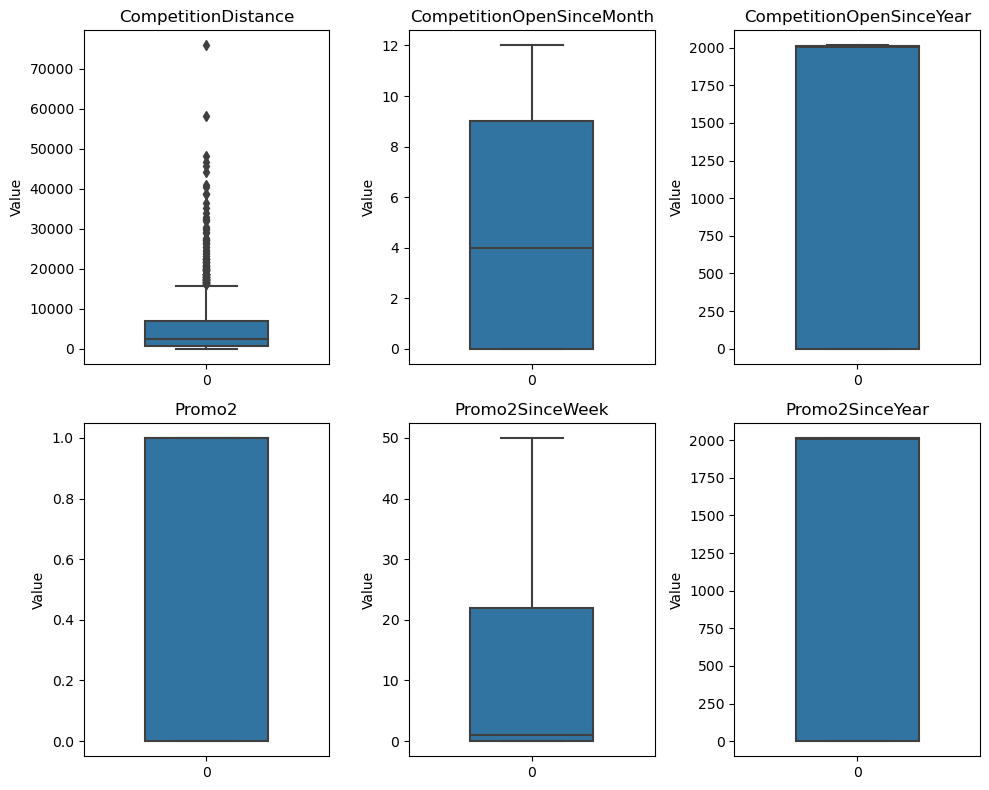

In [ ]:
plt.figure(figsize=(10, 8))
for i, var in enumerate(numerical_variable, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=pharma_store[var], orient="v", width=0.5)
    plt.title(var)
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

##### *Analysis*

* The analysis revealed that the 'CompetitionDistance' variable contains outliers, with a total count of 108. However, no outliers were detected in the other variables ('CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', and 'Promo2SinceYear'). While outliers were identified in 'CompetitionDistance', further investigation is warranted to determine whether these outliers should be removed or if alternative strategies such as winsorization or transformation are more appropriate for handling them.

In [ ]:
pharma_store1=pharma_store.copy()

### Hadndling outlier with Winsorization

In [ ]:
import numpy as np
from scipy.stats import mstats

competition_distance = pharma_store1['CompetitionDistance']

winsor_percentile = (0.5, 0.95)  

competition_distance_winsorized = mstats.winsorize(competition_distance, limits=winsor_percentile)

pharma_store1['CompetitionDistance'] = competition_distance_winsorized

##### Winsorization is a technique used to handle outliers by replacing extreme values with less extreme values, often the boundary values of a specified percentile range. By replacing extreme values with values within the specified percentile range (in this case, 0.5% to 95%), winsorization helps in handling outliers and ensures that extreme values do not unduly influence the analysis

In [ ]:
pharma_store1.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Finding outlier after Winsorization

In [ ]:
import warnings

outliers_count = {}

for var in numerical_variable:
    Q1 = pharma_store1[var].quantile(0.25)
    Q3 = pharma_store1[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    var_outliers = pharma_store1[(pharma_store1[var] < lower_bound) | (pharma_store1[var] > upper_bound)]
    outliers_count[var] = len(var_outliers)

warnings.filterwarnings("ignore", message="Warning: 'partition' will ignore the 'mask' of the MaskedArray.")

print("Outliers counts:")
for var, count in outliers_count.items():
    print(f"{var}: {count}")



Outliers counts:
CompetitionDistance: 0
CompetitionOpenSinceMonth: 0
CompetitionOpenSinceYear: 0
Promo2: 0
Promo2SinceWeek: 0
Promo2SinceYear: 0


## Task 1 - Exploration of customer purchasing behaviour

### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [ ]:
train_promo_distribution = pharma_train['Promo'].value_counts(normalize=True)
test_promo_distribution = pharma_test['Promo'].value_counts(normalize=True)

print("Training dataset 'Promo' distribution:")
print(train_promo_distribution)
print("\nTest dataset 'Promo' distribution:")
print(test_promo_distribution)

Training dataset 'Promo' distribution:
0    0.618485
1    0.381515
Name: Promo, dtype: float64

Test dataset 'Promo' distribution:
0    0.604167
1    0.395833
Name: Promo, dtype: float64


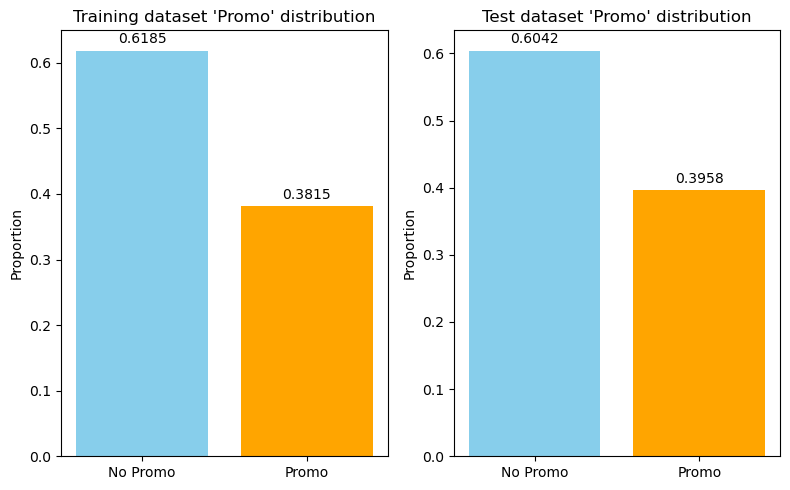

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Plot for training dataset
train_bars = ax[0].bar(train_promo_distribution.index, train_promo_distribution.values, color=['skyblue', 'orange'])
ax[0].set_title("Training dataset 'Promo' distribution")
ax[0].set_xticks(train_promo_distribution.index)
ax[0].set_xticklabels(['No Promo', 'Promo'])
ax[0].set_ylabel("Proportion")

# Plot for test dataset
test_bars = ax[1].bar(test_promo_distribution.index, test_promo_distribution.values, color=['skyblue', 'orange'])
ax[1].set_title("Test dataset 'Promo' distribution")
ax[1].set_xticks(test_promo_distribution.index)
ax[1].set_xticklabels(['No Promo', 'Promo'])
ax[1].set_ylabel("Proportion")

def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(ax[0], train_bars)
add_labels(ax[1], test_bars)

plt.tight_layout()
plt.show()

#### Analysis:

Training Dataset 'Promo' Distribution:

61.85% of the entries in the training dataset indicate no promotional activity ('No Promo').
38.15% of the entries in the training dataset indicate promotional activity ('Promo').
Test Dataset 'Promo' Distribution:

60.42% of the entries in the test dataset indicate no promotional activity ('No Promo').
39.58% of the entries in the test dataset indicate promotional activity ('Promo').

#### Conclusion:

* Consistency in Distribution:
Both the training and test datasets exhibit a similar distribution pattern, with a slightly higher proportion of entries indicating no promotional activity compared to those indicating promotional activity.
This consistency suggests that the promotional activity distribution in the training dataset adequately represents that of the test dataset.

* Promotional Strategy Assessment:
The data suggests that promotional activities are significant but not overwhelmingly dominant in both datasets. This indicates a balanced approach in marketing strategy, where promotions are utilized but not excessively.

* Model Generalization:
Given the similarity in the distribution between the training and test datasets, machine learning models trained on the training dataset might generalize well to the test dataset. However, further evaluation is needed to assess the model's performance.

* Potential Impact on Decision-Making:
Understanding the distribution of promotional activities can aid in decision-making processes related to resource allocation, marketing strategy refinement, and assessing the effectiveness of promotional campaigns.

### Distribution of Promo with Trian Data set

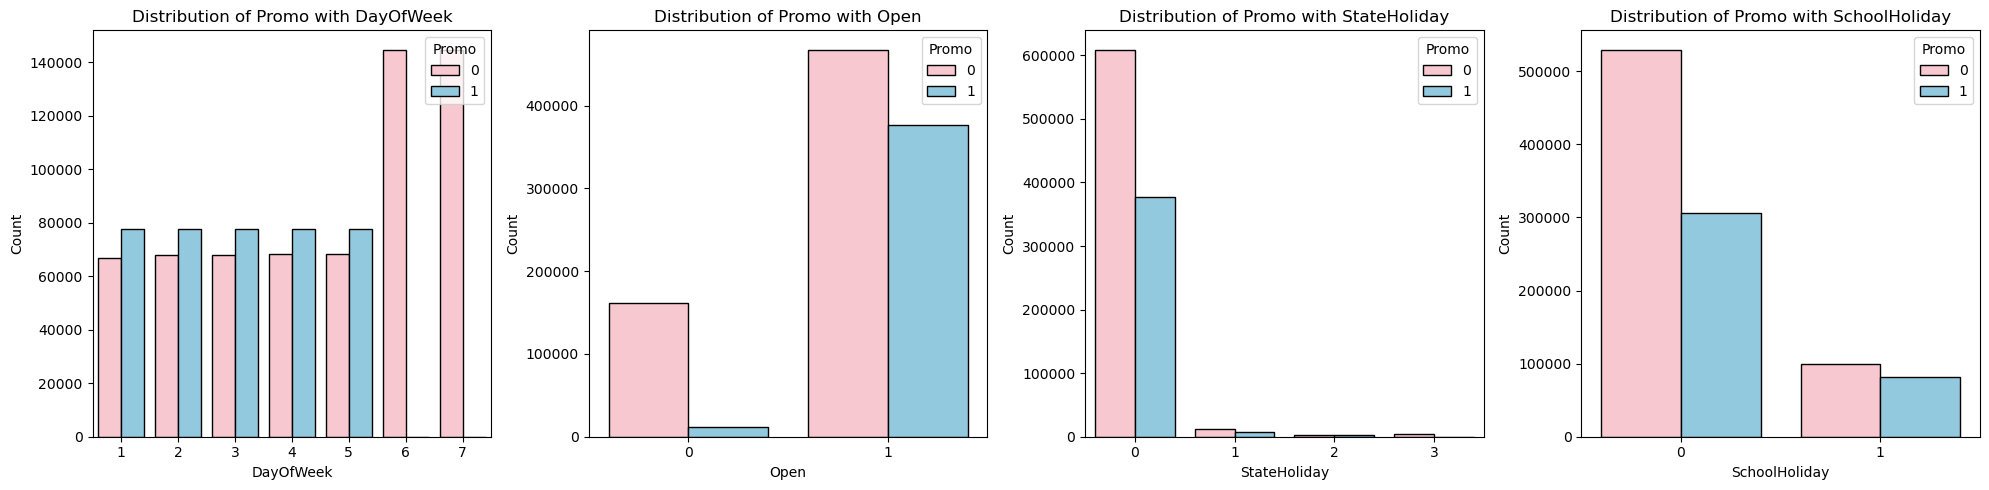

In [ ]:
columns_to_plot = ['DayOfWeek', 'Open', 'StateHoliday', 'SchoolHoliday']

colors = ['pink', 'skyblue'] 
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 5))
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue='Promo', data=pharma_train, ax=axes[i], palette=colors, edgecolor='black')
    axes[i].set_title(f'Distribution of Promo with {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Promo', loc='upper right')
plt.tight_layout()
plt.show()

### Distribution of Promo with Test Data set

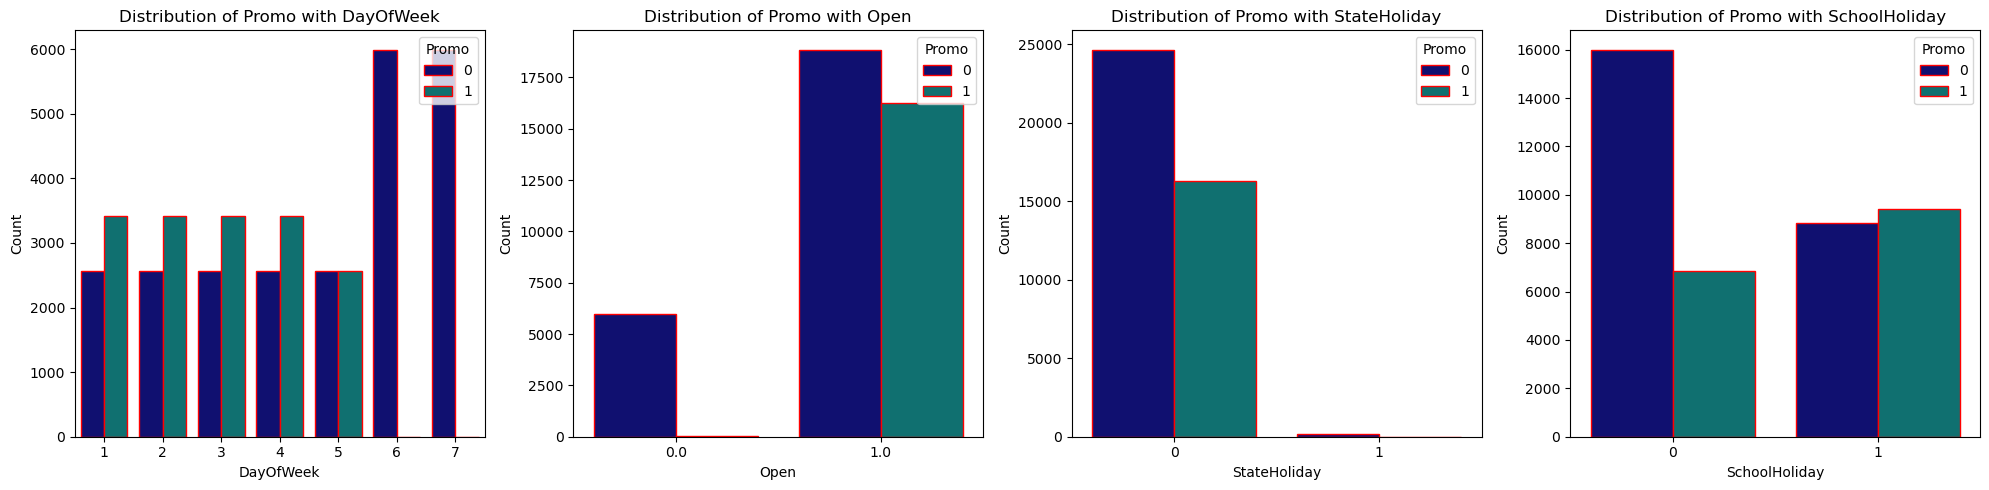

In [ ]:
columns_to_plot = ['DayOfWeek', 'Open', 'StateHoliday', 'SchoolHoliday']

colors = ['navy', 'teal'] 
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 5))
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue='Promo', data=pharma_test, ax=axes[i], palette=colors, edgecolor='red')
    axes[i].set_title(f'Distribution of Promo with {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Promo', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
from scripts.eda import explore_data, visualize_data

In [52]:
eda_train=visualize_data(pharma_train)


KeyError: 'numerical_column'

<Figure size 800x600 with 0 Axes>

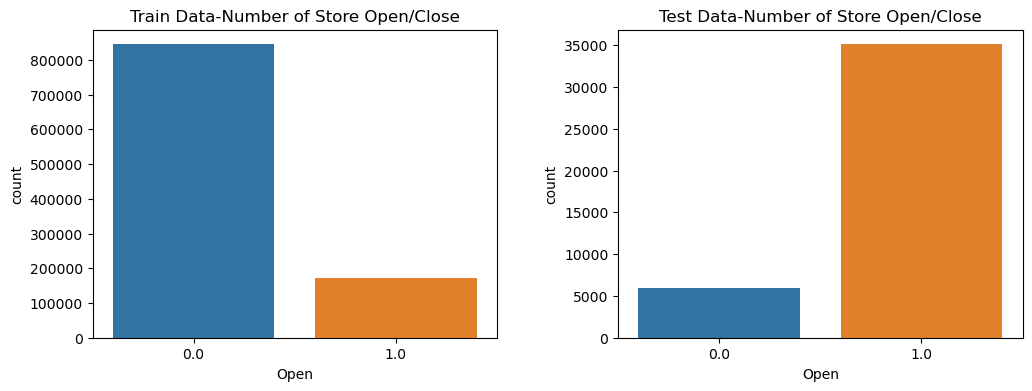

In [ ]:
stores_types = ["Store type A", "Store type B", "Store type C", "Store type D"]
state_holidays = ["Normal Day", "Public holiday", "Easter holiday", "Christmas"]
school_holidays = ["School is closed", "School is open"]
assortment = ["Basic", "Extra", "Extended"]
promo = ["Not participating", "Participating"]
store_open = {"Closed": "Closed", "Open": "Open"}  

def compare_test_train(pharma_train, pharma_test, feature, title):

    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
    ax[0].set_title("Train " + title)
    sns.countplot(x=feature, data=pharma_train, ax=ax[0])
    
    ax[1].set_title("Test " + title)
    sns.countplot(x=feature, data=pharma_test, ax=ax[1])
    fig.subplots_adjust(wspace=0.3)
    plt.show()

    pharma_train[feature] = pharma_train[feature].apply(lambda x: store_open.get(x, x))
    pharma_test[feature] = pharma_test[feature].apply(lambda x: store_open.get(x, x))

compare_test_train(pharma_train, pharma_test, 'Open', "Data-Number of Store Open/Close")

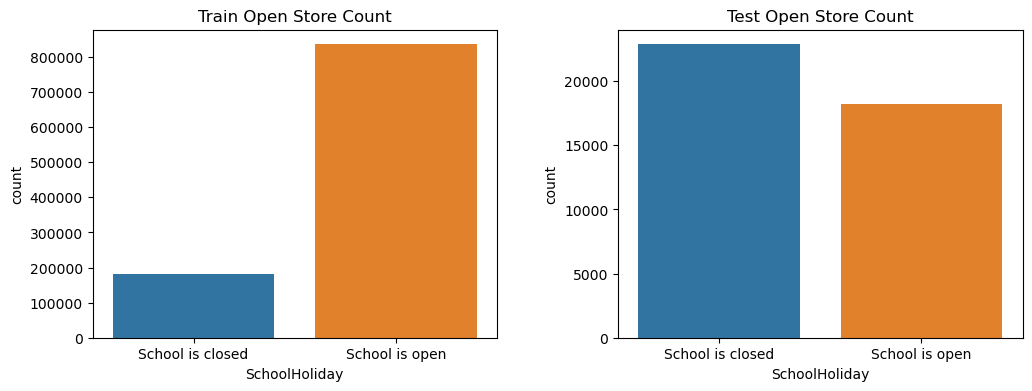

In [ ]:
pharma_train["SchoolHoliday"] = pharma_train["SchoolHoliday"].apply(lambda x: school_holidays[x])
pharma_test["SchoolHoliday"] = pharma_test["SchoolHoliday"].apply(lambda x: school_holidays[x])
compare_test_train(pharma_train, pharma_test, 'SchoolHoliday', "Open Store Count")

In [ ]:
state_holiday_train = pharma_train.groupby(['StateHoliday']).agg({'StateHoliday': ['count']})
state_holiday_train.columns = ['count']
state_holiday_train = state_holiday_train.reset_index()
state_holiday_train["StateHoliday"] = state_holiday_train["StateHoliday"].apply(lambda x: state_holidays[x])
state_holiday_train

,StateHoliday,count
0,Normal Day,986159
1,Public holiday,20260
2,Easter holiday,6690
3,Christmas,4100


In [ ]:
state_holiday_test = pharma_test.groupby(['StateHoliday']).agg({'StateHoliday': ['count']})
state_holiday_test.columns = ['count']
state_holiday_test = state_holiday_test.reset_index()
state_holiday_test["StateHoliday"] = state_holiday_test["StateHoliday"].apply(lambda x: state_holidays[x])
state_holiday_test

,StateHoliday,count
0,Normal Day,40908
1,Public holiday,180


In [ ]:
stores_types = ["Store type A", "Store type B", "Store type C", "Store type D"]
state_holidays = ["Normal Day", "Public holiday", "Easter holiday", "Christmas"]
school_holidays = ["School is closed", "School is open"]
assortment = ["Basic", "Extra", "Extended"]
promo = ["Not participating", "Participating"]
store_open = {"Closed": "Closed", "Open": "Open"}  # Mapping each value to itself

def compare_test_train(pharma_train, pharma_test, feature, title):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
    ax[0].set_title("Train " + title)
    sns.countplot(x=feature, data=pharma_train, ax=ax[0])
    
    ax[1].set_title("Test " + title)
    sns.countplot(x=feature, data=pharma_test, ax=ax[1])
    fig.subplots_adjust(wspace=0.3)
    plt.show()

    pharma_train[feature] = pharma_train[feature].apply(lambda x: store_open.get(x, x))
    pharma_test[feature] = pharma_test[feature].apply(lambda x: store_open.get(x, x))

# Call the function for Sales column
compare_test_train(pharma_train, pharma_test, 'Sales', "Sales Behavior")

# Group by StateHoliday and count occurrences
state_holiday_train = pharma_train.groupby(['StateHoliday']).size().reset_index(name='Count')
state_holiday_train["StateHoliday"] = state_holiday_train["StateHoliday"].apply(lambda x: state_holidays[x])
print(state_holiday_train)

ValueError: Could not interpret input 'Sales'

Error in callback <function flush_figures at 0x0000019CE2CEFC70> (for post_execute):


KeyboardInterrupt: 